### Cardiac Arrhythmia Multy-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify your choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results? Do you see any significant change? Why or why not? 

Next, use data reduction method you have learned in class to reduce the size of data, and agian try above models. Do you get better results? Justify your answer. 

<font color = 'red'>Due date for full credit: April 4, 11:59 PM
    <br>
    Due date for partial credit: April 6, 11:59 PM.
    <br> No submission will be accepted after April 6. 
    <br> Please note that your term paper is also due April 6. 
    </font>

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
KNN = []
LOGISTIC = []
LINEARSVM = []
KERNELSVM = []
DECISIONTREE = []
RANDOM = []

In [3]:
cardiac = pd.read_csv('cardiac_arrhythmia.csv', header = None)

In [4]:
cardiac.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [5]:
cardiac.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
cardiac.describe(include = ['O'])

,10,11,12,13,14
count,452,452,452,452,452
unique,171,102,135,70,64
top,52,60,49,?,63
freq,13,23,9,376,21


In [7]:
[cardiac[i].value_counts()['?'] for i in range(10,15)]

[8, 22, 1, 376, 1]

# Let's Remove Column 13

In [8]:
cardiac1 = cardiac.drop([13],axis = 1)

# Dropping null values from 10,12 & 14

In [9]:
cardiac1.replace(['?'], [np.nan], inplace=True)

In [10]:
for i in [11,10,12,14]:
    cardiac1[i] = cardiac1[i].astype(float)

In [11]:
cardiac1.isnull().sum().sum()

32

In [12]:
cardiac1 = cardiac1.dropna()

In [13]:
cardiac1.shape

(420, 279)

In [14]:
cardiac1.isnull().sum().sum()

0

# Missing Values have been taken care of

# Now let's get familiar with the target variable

In [15]:
cardiac1[279].value_counts()

1     237
10     48
2      36
6      24
16     18
4      14
5      13
3      13
9       9
14      4
8       2
7       2
Name: 279, dtype: int64

In [16]:
X = cardiac1.drop(279,axis = 1)

In [17]:
y = cardiac1[279]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

# K-NN 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8]}]
scores = ['precision', 'recall']

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn.score(X_test,y_test))

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 3}
0.6285714285714286
0.6666666666666666


In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
KNN.append(knn.score(X_test, y_test))

In [24]:
confusion_matrix(y_test, knn.predict(X_test))

array([[63,  0,  0,  1,  0,  2,  0,  0,  0,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

In [23]:
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          1       0.68      0.95      0.79        66
          2       1.00      0.25      0.40         8
          3       1.00      0.50      0.67         2
          4       0.00      0.00      0.00         2
          5       1.00      0.25      0.40         4
          6       0.00      0.00      0.00         6
          9       1.00      1.00      1.00         1
         10       0.67      0.25      0.36         8
         14       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         7

avg / total       0.62      0.67      0.59       105



C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log_grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
log_grid.fit(X_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
log_grid.best_params_

{'C': 0.001}

In [28]:
log_grid.best_score_

0.7015873015873015

In [29]:
logreg = LogisticRegression(C = 0.001)

In [30]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logreg.score(X_test,y_test)

0.7238095238095238

In [32]:
LOGISTIC.append(logreg.score(X_test,y_test))

In [33]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[59,  1,  0,  0,  0,  0,  0,  5,  0,  1],
       [ 4,  3,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

In [34]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          1       0.81      0.89      0.85        66
          2       0.50      0.38      0.43         8
          3       0.67      1.00      0.80         2
          4       0.50      0.50      0.50         2
          5       1.00      0.25      0.40         4
          6       1.00      0.33      0.50         6
          9       1.00      1.00      1.00         1
         10       0.44      0.88      0.58         8
         14       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         7

avg / total       0.71      0.72      0.69       105



C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Linear SVM 

In [35]:
from sklearn.svm import SVC

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_linsvm = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5)

In [37]:
grid_search_linsvm.fit(X_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
grid_search_linsvm.best_params_

{'C': 0.001, 'gamma': 0.001}

In [39]:
grid_search_linsvm.best_score_

0.6698412698412698

In [40]:
lsvm = SVC(C = 0.001, gamma = 0.001,kernel = 'linear')

In [41]:
lsvm.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
lsvm.score(X_test, y_test)

0.7047619047619048

In [43]:
LINEARSVM.append(lsvm.score(X_test, y_test))

In [44]:
confusion_matrix(y_test, lsvm.predict(X_test))

array([[58,  2,  0,  0,  0,  0,  0,  4,  0,  2],
       [ 5,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  1,  0,  0,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  5,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 3,  1,  1,  0,  0,  1,  0,  1,  0,  0]], dtype=int64)

In [45]:
print(classification_report(y_test, lsvm.predict(X_test)))

             precision    recall  f1-score   support

          1       0.82      0.88      0.85        66
          2       0.43      0.38      0.40         8
          3       0.67      1.00      0.80         2
          4       0.33      0.50      0.40         2
          5       1.00      0.25      0.40         4
          6       0.67      0.33      0.44         6
          9       1.00      1.00      1.00         1
         10       0.45      0.62      0.53         8
         14       0.50      1.00      0.67         1
         16       0.00      0.00      0.00         7

avg / total       0.69      0.70      0.68       105



# Kernalized SVM

In [46]:
from sklearn.svm import SVC

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_Kernel = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5)

In [48]:
grid_search_Kernel.fit(X_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
grid_search_Kernel.best_params_

{'C': 0.001, 'gamma': 0.001}

In [51]:
kernelsvm = SVC(C = 0.001, gamma = 0.001,kernel = 'rbf',random_state=4)

In [52]:
kernelsvm.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=4, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
kernelsvm.score(X_test, y_test)

0.6285714285714286

In [54]:
KERNELSVM.append(kernelsvm.score(X_test, y_test))

In [55]:
confusion_matrix(y_test, kernelsvm.predict(X_test))

array([[66,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [56]:
print(classification_report(y_test, kernelsvm.predict(X_test)))

             precision    recall  f1-score   support

          1       0.63      1.00      0.77        66
          2       0.00      0.00      0.00         8
          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         6
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         8
         14       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         7

avg / total       0.40      0.63      0.49       105



C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8]}]

dectree = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10)
dectree.fit(X_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)


C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 6}
0.6730158730158731


In [60]:
tree = DecisionTreeClassifier(max_depth=6,random_state=4)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.743


In [61]:
DECISIONTREE.append(tree.score(X_test, y_test))

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]}]

dectree = GridSearchCV(RandomForestClassifier(random_state = 4), tuned_parameters, cv=10)
dectree.fit(X_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 11}
0.7365079365079366


In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth =11,n_estimators = 70, random_state = 2)
forest.fit(X_train, y_train)
print("Accuracy of train set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy of train set: 0.971
Accuracy of test set: 0.771


In [65]:
RANDOM.append(forest.score(X_test, y_test))

# Bagging Ensemble

### Decision Tree

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=4, max_depth = 7), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
DECISIONTREE.append(accuracy_score(y_test, y_pred))

0.8


### Random Forest 

In [68]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [69]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [71]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.9238095238095239

In [72]:
RANDOM.append(np.sum(y_pred == y_pred_rf) / len(y_pred))

## Logistic Regression

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bag_clf = BaggingClassifier(LogisticRegression(C = 0.001,random_state = 4), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7238095238095238


In [75]:
LOGISTIC.append(accuracy_score(y_test, y_pred))

## SVM

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bag_clf = BaggingClassifier(SVC(C = 0.001,gamma = 0.001,kernel = 'linear'), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6952380952380952


In [78]:
LINEARSVM.append(accuracy_score(y_test, y_pred))

# Kernelized SVM

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bag_clf = BaggingClassifier(SVC(C = 0.001,gamma = 0.001,kernel = 'rbf'), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6285714285714286


In [81]:
KERNELSVM.append(accuracy_score(y_test, y_pred))

## KNN

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bag_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors = 3), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=10)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.638095238095238


In [84]:
KNN.append(accuracy_score(y_test, y_pred))

# Out of bag evaluation

In [85]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7746031746031746

In [86]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.819047619047619

# gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
print("Accuracy of Train set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy of Test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy of Train set: 1.000
Accuracy of Test set: 0.771


# Voting Classifier- hard Voting

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(C = 0.001,random_state=42)
rnd_clf = RandomForestClassifier(max_depth = 5,random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [89]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7238095238095238
RandomForestClassifier 0.7333333333333333
SVC 0.6285714285714286
VotingClassifier 0.7238095238095238


C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Voting Classifier- soft voting

In [90]:
log_clf = LogisticRegression(random_state=4)
rnd_clf = RandomForestClassifier(random_state=4)
svm_clf = SVC(probability=True, random_state=4)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=4, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFore...rbf',
  max_iter=-1, probability=True, random_state=4, shrinking=True, tol=0.001,
  verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [91]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6095238095238096
RandomForestClassifier 0.780952380952381
SVC 0.6285714285714286
VotingClassifier 0.6761904761904762


C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Principal Component Analysis

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
mx = MinMaxScaler()

In [94]:
X_scaled = mx.fit_transform(X)

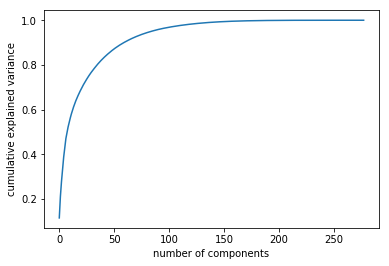

In [95]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [97]:
X_pca

array([[ 0.22283541,  0.20119947,  0.49588403, ...,  0.0455455 ,
        -0.09843462,  0.0773713 ],
       [-0.16645874, -0.77069121,  0.08425508, ..., -0.01657114,
         0.01210935, -0.04264477],
       [-0.34382833,  1.35747651, -1.14653044, ..., -0.13808051,
        -0.06633738,  0.12304129],
       ...,
       [ 2.20232728,  1.198482  , -0.51892131, ..., -0.04590761,
        -0.03393309, -0.04512304],
       [-0.63688484, -0.62783057,  0.11356079, ...,  0.07058285,
        -0.07159699,  0.08772092],
       [-0.19161575, -0.2667056 , -0.24546769, ...,  0.0684029 ,
        -0.02227287,  0.06224735]])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_pca_train,X_pca_test,y_train,y_test = train_test_split(X_pca,y,random_state = 0)

# Performing Classification after PCA

## KNN

In [101]:
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8]}]
scores = ['precision', 'recall']

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)
clf.fit(X_pca_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_pca_train, y_train)
print(knn.score(X_pca_test,y_test))

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 3}
0.6158730158730159
0.6666666666666666


In [102]:
knn.fit(X_pca_train,y_train)
knn.score(X_pca_test,y_test)

0.6666666666666666

In [103]:
KNN.append(knn.score(X_pca_test,y_test))

## Logistic Regression

In [104]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log_grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
log_grid.fit(X_pca_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
log_grid.best_params_

{'C': 1}

In [106]:
logreg = LogisticRegression(C = 1)
logreg.fit(X_pca_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
logreg.score(X_pca_test,y_test)

0.7523809523809524

In [108]:
LOGISTIC.append(logreg.score(X_pca_test,y_test))

## Linear SVM

In [109]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_linsvm = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5)
grid_search_linsvm.fit(X_pca_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
grid_search_linsvm.best_params_

{'C': 1, 'gamma': 0.001}

In [111]:
lsvm = SVC(C = 1, gamma = 0.001,kernel = 'linear')
lsvm.fit(X_pca_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
lsvm.score(X_pca_test,y_test)

0.7238095238095238

In [113]:
LINEARSVM.append(lsvm.score(X_pca_test,y_test))

## Kernalized SVM

In [114]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_kernel = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5)
grid_search_kernel.fit(X_pca_train, y_train)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [115]:
grid_search_kernel.best_params_

{'C': 100, 'gamma': 0.01}

In [116]:
kernelsvm = SVC(C = 100, gamma = 0.01,kernel = 'rbf')
kernelsvm.fit(X_pca_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
kernelsvm.score(X_pca_test,y_test)

0.7333333333333333

In [118]:
KERNELSVM.append(kernelsvm.score(X_pca_test,y_test))

## Decision Tree

In [119]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8]}]

dectree = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10)
dectree.fit(X_pca_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)


C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 2}
0.5587301587301587


In [120]:
tree = DecisionTreeClassifier(max_depth=2,random_state=4)
tree.fit(X_pca_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_pca_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_pca_test, y_test)))

Accuracy on training set: 0.616
Accuracy on test set: 0.648


In [121]:
DECISIONTREE.append(tree.score(X_pca_test, y_test))

## Random Forest

In [122]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]}]

random = GridSearchCV(RandomForestClassifier(random_state = 4), tuned_parameters, cv=10)
random.fit(X_pca_train, y_train)
print(random.best_params_)
print(random.best_score_)

C:\Users\sat170430\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 7}
0.5936507936507937


In [123]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth =7,n_estimators = 70, random_state = 2)
forest.fit(X_train, y_train)
print("Accuracy of train set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy of train set: 0.870
Accuracy of test set: 0.733


In [124]:
RANDOM.append(tree.score(X_pca_test, y_test))

# Comparing Results

In [125]:
a= [KNN, LOGISTIC, LINEARSVM, KERNELSVM, DECISIONTREE, RANDOM]

In [126]:
comparison = pd.DataFrame(a)

In [127]:
comparison.columns = ['Simple','Bagging', 'PCA']
comparison.index = ['knn','logistic','lnearsvm','kernelsvm','decisiontree','randomforest']

In [128]:
comparison

,Simple,Bagging,PCA
knn,0.666667,0.638095,0.666667
logistic,0.723810,0.723810,0.752381
lnearsvm,0.704762,0.695238,0.723810
kernelsvm,0.628571,0.628571,0.733333
decisiontree,0.742857,0.800000,0.647619
randomforest,0.771429,0.923810,0.647619


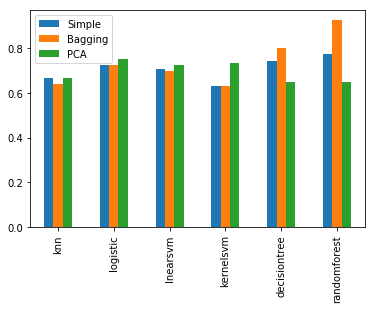

In [129]:
comparison.plot(kind = 'bar')

# Conclusion

## Bagging seems to work well for decision trees and random forest classifiers as these algorithms learn well colaboratively.

## Performing classification after PCA helped increase the accuracy of KNN, Logistic Regression, SVM but it reduced the accuracy of decision trees and random forest.

## This is due to the information loss after PCA

# Thank You

# Effort Table

### Shubhankar Thakar  -> 100%
### Gaurav Aggarwal    -> 100%